# Machine Learning in Bioinformatics

# Homework 2: 
 !!! If you don't fill these fields, your homework does not count !!!<by/>
 #### first name and last name : Yasamin Tabatabaee
 #### student number : 95104866

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`. <br/>
We highly recommend you to read each line of code carefully and try to understand what it exactly does. <br/>
Just alter the parts that is between green comments and specified for you. Please do not change other parts.

In [14]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
from tabulate import tabulate

# Problem 1. soft margin SVM
### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label that is called target. We should find a proper hyperplane that separates malignant and benign samples.
The original dataset labels is 0 and 1 and in the following code boxes we change it to -1 and 1.

In [17]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
cancer.target = np.where(cancer.target==0, -1, cancer.target) 
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO: using train_test_split package, split your data into 3 numpy array     #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 72%     test : 20%       validation : 8%                            #
################################################################################

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

71.8804920913884 %
71.8804920913884 %
20.035149384885763 %
20.035149384885763 %
8.084358523725834 %
8.084358523725834 %


### soft margin SVM optimization:<br/>
We add 1 at the beginning of each Xs data (X_train, X_val , ...) and then the bias will be calculated implicitly.
Then you should minimize the following SVM loss function (using gradient descent) with changing parameters of model.<br>
In this notation: 
\begin{equation}
x_i , y_i
\end{equation}
refers to feature vector of the sample and the label of our training data<br>
and this is SVM loss function:

\begin{equation}
\large
J(W) = \frac{1}{N} \sum_{i=1}^{N}{L^{(i)}} + \frac{\lambda}{2} ||W||^2\\
\large
L^{(i)} ={max(0, 1 - y_i(w^{T}x_i)})
\;\\
\end{equation} 


In [19]:
# >>>>>WARNING: RUN THIS CELL ONLY ONCE!<<<<<

# adding 1s to the end of feature vectors to be multiplied by bias term of weights
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  
print(X_val.shape)  
print(X_test.shape) 

(409, 31)
(46, 31)
(114, 31)


Complete the following functions in SVM class. In the part that you should compute loss function of this class, you are not allowed to use "for" loop.

In [20]:
class SVM:
    def __init__(self, n_features: int, std: float):
        """
        n_features: number of features in (or the dimension of) each instance
        std: standard deviation used in the initialization of the weights of svm
        """
        self.n_features = n_features
        ################################################################################
        # TODO: Initialize the weights of svm using random normal distribution with    #
        # standard deviation equals to std.                                            #
        ################################################################################

        self.w = np.random.normal(scale=std, size=n_features)

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

    def loss(self, X: np.ndarray, y: np.ndarray, reg_coeff: float):
        """
        X: training instances as a 2d-array with shape (num_train, n_features)
        y: labels corresponsing to the given training instances as a 1d-array with shape (num_train,)
        reg_coeff: L2-regularization coefficient
        """
        loss = 0.0
        
        #################################################################################
        # TODO: Compute the hinge loss specified in the notebook and save it in the loss#                                                   # loss variable.                                                               #
        # NOTE: YOU ARE NOT ALLOWED TO USE FOR LOOPS!                                   #
        # Don't forget L2-regularization term in your implementation!                   #
        #################################################################################
        
        hinge_loss = np.maximum(0, 1 - y * np.dot(X, self.w))
        loss = np.sum(hinge_loss) / self.n_features + reg_coeff / 2 * np.linalg.norm(self.w) ** 2

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return loss
        
    def update_weights(self,  X: np.ndarray, y: np.ndarray, learning_rate: float , reg_coeff: float):
        """
        Updates the weights of the svm using the gradient of computed loss with respect to the weights. 
        learning_rate: learning rate that will be used in gradient descent to update the weights
        """
        ################################################################################
        # TODO: Compute the gradient of loss computed above w.r.t the svm weights.     #
        # and then update self.w with the computed gradient.                           #
        # (don't forget learning rate and reg_coeff in update rule)                    #
        # Don't forget L2-regularization term in your implementation!                  #
        ################################################################################
        
        loss = np.maximum(0, 1 - y * np.dot(X, self.w))
        loss_indicator = np.zeros(loss.shape)
        loss_indicator[loss > 0] = 1
        gradient = 0.0
        for i in range(self.n_features):
            gradient += reg_coeff * self.w - loss_indicator[i] * X[i] * y[i]    
        self.w = self.w - learning_rate * gradient / self.n_features

        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
    def predict(self, X):
        """
        X: Numpy 2d-array of instances
        """
        y_pred = None
        ################################################################################
        # TODO: predict the labels for the instances in X and save them in y_pred.     #                                      #
        ################################################################################

        y_pred = np.sign(np.dot(X, self.w))
        
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        return y_pred


This cell contains your hyper parameters:

In [21]:
std = 0.0001
num_iters = 15000
reg_coeff = 20
learning_rate=1e-8

In this cell using your SVM class, we want to train our model for cancer data:<br/>
In every iteration you should see your training loss decrease.

In [31]:
from sklearn.metrics import accuracy_score
model = SVM(n_features=X_train.shape[1], std= std )
loss_history = []
loss_val_history = []
for it in range(num_iters):
    loss = model.loss(X_train, y_train, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_train, y_train, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 13.673703, val acc 76.09%
iteration 100, loss 13.220285, val acc 76.09%
iteration 200, loss 12.766877, val acc 23.91%
iteration 300, loss 12.326071, val acc 23.91%
iteration 400, loss 12.093623, val acc 23.91%
iteration 500, loss 12.015237, val acc 23.91%
iteration 600, loss 12.001015, val acc 23.91%
iteration 700, loss 11.991334, val acc 23.91%
iteration 800, loss 11.971461, val acc 23.91%
iteration 900, loss 11.953015, val acc 23.91%
iteration 1000, loss 11.934111, val acc 23.91%
iteration 1100, loss 11.915789, val acc 23.91%
iteration 1200, loss 11.898208, val acc 23.91%
iteration 1300, loss 11.881814, val acc 23.91%
iteration 1400, loss 11.864266, val acc 23.91%
iteration 1500, loss 11.846791, val acc 23.91%
iteration 1600, loss 11.830620, val acc 23.91%
iteration 1700, loss 11.813395, val acc 23.91%
iteration 1800, loss 11.796197, val acc 23.91%
iteration 1900, loss 11.780242, val acc 23.91%
iteration 2000, loss 11.763044, val acc 23.91%
iteration 2100, loss 11.7

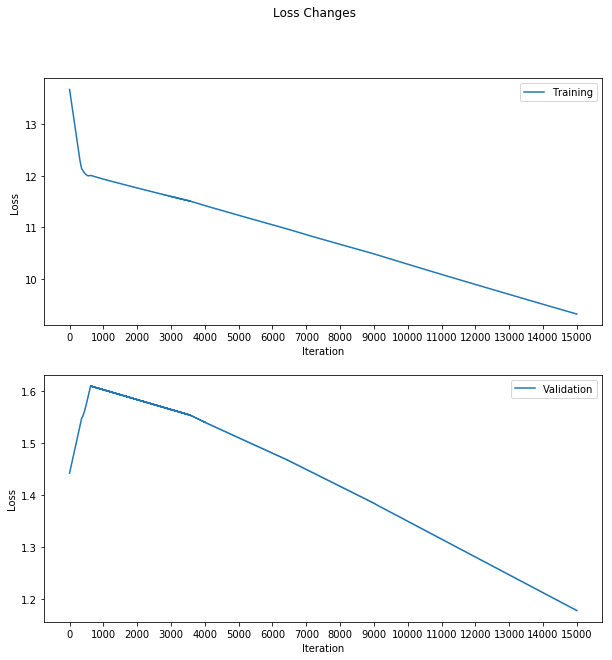

In [32]:
####################################################################################
# TODO: using matplotlib.pyplot package plot the training loss and validation loss #
# using loss_loss_history and loss_val_history                                     #
####################################################################################

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss Changes')
ax1.set(xlabel='Iteration', ylabel='Loss', xticks = np.arange(0, num_iters + 1, 1000))
ax2.set(xlabel='Iteration', ylabel='Loss', xticks = np.arange(0, num_iters + 1, 1000))
ax1.plot(range(0, num_iters), loss_history, label='Training')
ax2.plot(range(0, num_iters), loss_val_history, label='Validation')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()    

####################################################################################
#                                 END OF YOUR CODE                                 #
####################################################################################


### Question 1:
With changing your hyper parameters, find a configuration of hyper parameters that cause your loss to increase after each iteration and then report that configuration in the next cell. Explain why our loss increases?
Write your answer in ""

std = "" <br>
num_iters = ""<br>
reg_coeff = ""<br>
learning_rate = ""<br>

### Question 2:
In this cell please explain the reason of this event<br>
Answer:

In [34]:
val_preds =  model.predict(X_test)
###########################################################################################
# TODO: find the Confusion Matrix between val_preds and real labels (y_test) for test data#
# then report the accuracy of the model.                                                  #
# you are not allowed to use any premade function for accuracy and confusion matrix       #
###########################################################################################

def confusion_matrix(y, y_pred):
    tp = np.count_nonzero((y_pred == 1) & (y == 1))
    fp = np.count_nonzero((y_pred == 1) & (y == -1))
    tn = np.count_nonzero((y_pred == -1) & (y == -1))
    fn = np.count_nonzero((y_pred == -1) & (y == 1)) 
    return tp, fp, tn, fn

tp, fp, tn, fn = confusion_matrix(y_test, val_preds)
print(tabulate([['Predicted Positive', tp, fp], ['Predicted Negative', fn, tn]], headers=['', 'Actually Positive', 'Actually Negative']))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy = ", accuracy)

###########################################################################################
#                                END OF YOUR EXPLANATION                                  #
###########################################################################################


                      Actually Positive    Actually Negative
------------------  -------------------  -------------------
Predicted Positive                   63                    2
Predicted Negative                    7                   42
Accuracy =  0.9210526315789473


In the next part, we sample from training data with certain size (batch size) instead of using all the training data in each iteration, and train our model on batch data:

In [35]:
std = 0.0001
batch_size = 200
num_iters = 15000
reg_coeff = 20
learning_rate=1e-8
model = SVM(n_features=X_train.shape[1], std= std )

In [36]:
loss_history = []
loss_val_history = []
for it in range(num_iters):
    X_batch = None
    y_batch = None
    ################################################################################
    # TODO: Sample batch_size elements from the training data and their            #
    # corresponding labels to use in this round of gradient descent.               #
    # Store the data in X_batch and their corresponding labels in                  #
    # y_batch; after sampling X_batch should have shape (batch_size, n_features)   #
    # and y_batch should have shape (batch_size,)                                  #
    #                                                                              #
    # Hint: Use np.random.choice to generate indices. Sampling with                #
    # replacement is faster than sampling without replacement.                     #
    ################################################################################

    indices = np.random.choice(X_train.shape[0], batch_size, replace=True)
    X_batch = X_train[indices]
    y_batch = y_train[indices]
    
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    loss = model.loss(X_batch, y_batch, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_batch, y_batch, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 6.399298, val acc 23.91%
iteration 100, loss 6.187880, val acc 23.91%
iteration 200, loss 5.688584, val acc 23.91%
iteration 300, loss 5.944802, val acc 23.91%
iteration 400, loss 6.049134, val acc 23.91%
iteration 500, loss 5.691396, val acc 23.91%
iteration 600, loss 5.956324, val acc 23.91%
iteration 700, loss 5.383063, val acc 23.91%
iteration 800, loss 5.665232, val acc 23.91%
iteration 900, loss 5.775318, val acc 23.91%
iteration 1000, loss 5.862754, val acc 23.91%
iteration 1100, loss 5.920478, val acc 23.91%
iteration 1200, loss 6.086372, val acc 23.91%
iteration 1300, loss 5.701470, val acc 23.91%
iteration 1400, loss 5.700512, val acc 23.91%
iteration 1500, loss 5.716749, val acc 23.91%
iteration 1600, loss 6.070379, val acc 23.91%
iteration 1700, loss 5.811972, val acc 23.91%
iteration 1800, loss 6.125349, val acc 23.91%
iteration 1900, loss 5.772376, val acc 23.91%
iteration 2000, loss 5.887160, val acc 23.91%
iteration 2100, loss 5.522721, val acc 23.91%


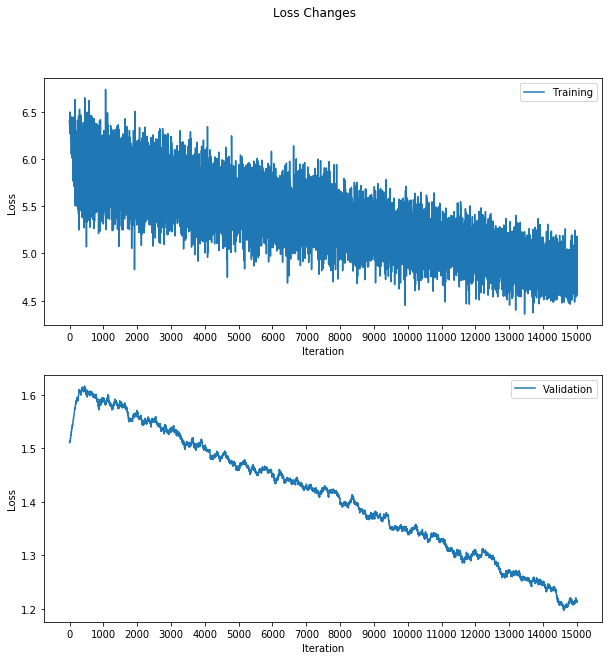

In [37]:
####################################################################################
# TODO: using matplotlib.pyplot package plot the training loss and validation loss #

####################################################################################

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss Changes')
ax1.set(xlabel='Iteration', ylabel='Loss', xticks = np.arange(0, num_iters + 1, 1000))
ax2.set(xlabel='Iteration', ylabel='Loss', xticks = np.arange(0, num_iters + 1, 1000))
ax1.plot(range(0, num_iters), loss_history, label='Training')
ax2.plot(range(0, num_iters), loss_val_history, label='Validation')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()

####################################################################################
#                                 END OF YOUR CODE                                 #
####################################################################################

### Question 3:
Explain why we see fluctuation in this plot?<br>
Answer:

# Problem 2. Perceptron

By now, you should know how to use and how to implement SVM from scratch.
In fact, for perceptron we can use premade functions as below:

In [38]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
val_preds = clf.predict(X_test)
print(confusion_matrix(y_test,val_preds,[1,-1]))
print('test acc %.2f%%' % (accuracy_score(y_test,val_preds) * 100)) 

[[70  0]
 [14 30]]
test acc 87.72%


### Question 4:
It is time for you to write your own code instead of completing some parts of a premade code.<br>
So you can not use any premade functions like the previous cell.
Write your code in the end of this .ipynb file <br>
You should make your model and use that to build these outputs:<br>
1- Report loss of training and accuracy of validation data on each epoch of training process.<br>
2- You are allowed to use any normalization approach if need be.<br>
3- Plot your training and validation loss vs number of iterations in one plot.<br>
4- Finally print your confusion matrix and accuracy for your testing set.<br>
With changing your hyperparameters try to get a good and reasonable accuracy and confusion matrix on testing set (similar to the accuracy when we used the package).

In [43]:
class Perceptron:
    def __init__(self, n_features: int):
        self.n_features = n_features
        self.w = np.zeros(n_features)
        

    def loss(self, X: np.ndarray, y: np.ndarray, reg_coeff: float):
        hinge_loss = np.maximum(0, 1 - y * np.dot(X, self.w)) 
        return np.sum(hinge_loss) / self.n_features

    
    def update_weights(self,  X: np.ndarray, y: np.ndarray, learning_rate: float , reg_coeff: float):
        loss = np.maximum(0, 1 - y * np.dot(X, self.w))
        loss_indicator = np.zeros(loss.shape)
        loss_indicator[loss > 0] = 1
        gradient = 0.0
        for i in range(self.n_features):
            gradient += loss_indicator[i] * X[i] * y[i]    
        self.w = self.w + learning_rate * gradient / self.n_features

        
    def predict(self, X):
        y_pred = np.sign(np.dot(X, self.w))
        return y_pred

In [45]:
# Hyper parameters

num_iters = 15000
learning_rate=1e-8

In [46]:
# Training

from sklearn.metrics import accuracy_score
model = Perceptron(n_features=X_train.shape[1])
loss_history = []
loss_val_history = []
for it in range(num_iters):
    loss = model.loss(X_train, y_train, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_train, y_train, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

TypeError: __init__() missing 1 required positional argument: 'std'

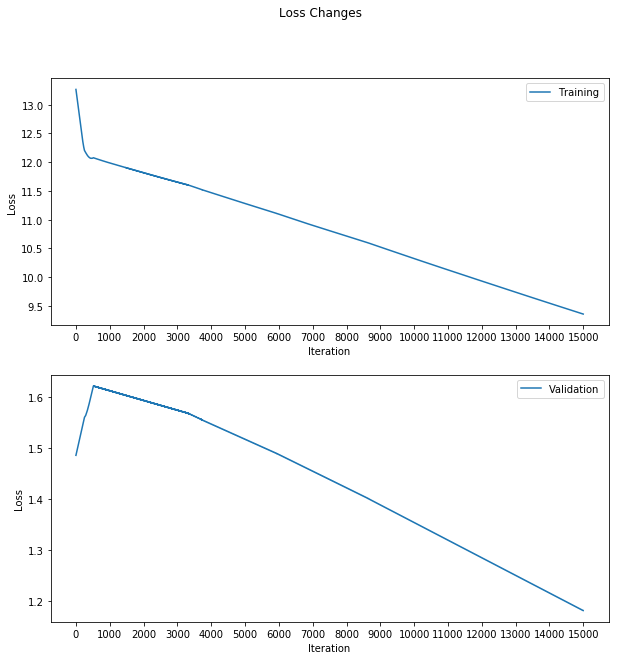

In [41]:
# Training/Validation loss plots

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss Changes')
ax1.set(xlabel='Iteration', ylabel='Loss', xticks = np.arange(0, num_iters + 1, 1000))
ax2.set(xlabel='Iteration', ylabel='Loss', xticks = np.arange(0, num_iters + 1, 1000))
ax1.plot(range(0, num_iters), loss_history, label='Training')
ax2.plot(range(0, num_iters), loss_val_history, label='Validation')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()    

In [42]:
# Confusion Matrix & Accuracy

val_preds =  model.predict(X_test)
def confusion_matrix(y, y_pred):
    tp = np.count_nonzero((y_pred == 1) & (y == 1))
    fp = np.count_nonzero((y_pred == 1) & (y == -1))
    tn = np.count_nonzero((y_pred == -1) & (y == -1))
    fn = np.count_nonzero((y_pred == -1) & (y == 1)) 
    return tp, fp, tn, fn

tp, fp, tn, fn = confusion_matrix(y_test, val_preds)
print(tabulate([['Predicted Positive', tp, fp], ['Predicted Negative', fn, tn]], headers=['', 'Actually Positive', 'Actually Negative']))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy = ", accuracy)

                      Actually Positive    Actually Negative
------------------  -------------------  -------------------
Predicted Positive                   63                    2
Predicted Negative                    7                   42
Accuracy =  0.9210526315789473
